# エージェントデザインパターンについて
* 『LangChainとLangGraphによるRAG・AIエージェント実践入門』より

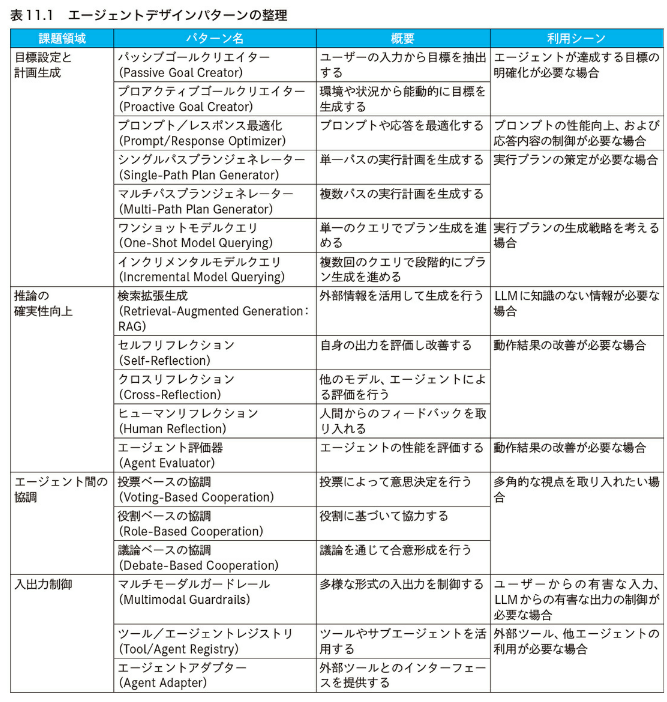

In [1]:
from IPython.display import Image
Image("./png/agent_pattern.png")

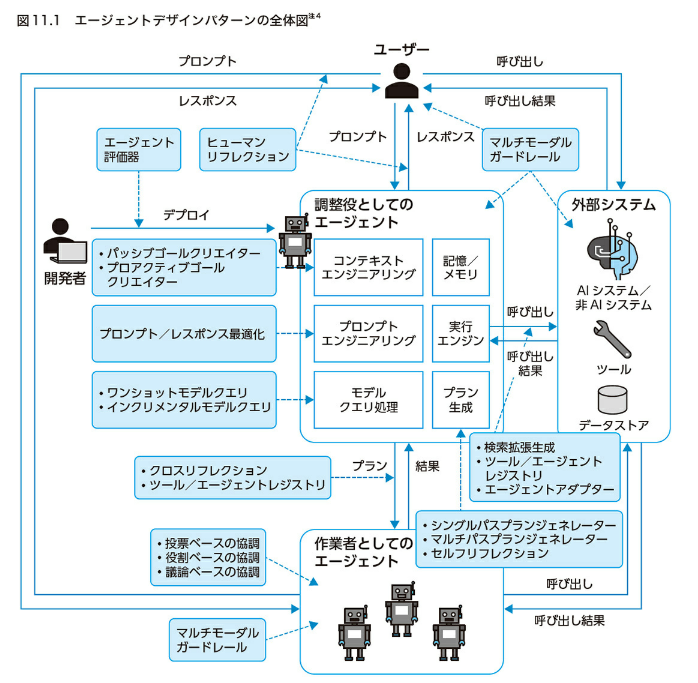

In [2]:
from IPython.display import Image
Image("./png/agent_flow_map.png")

* 調整役としてのエージェント
    * ユーザーからのプロンプトを受け取り、このプロンプトが何を意味しているかをコンテキストエンジニアリングによって明確化し、プロンプトエンジニアリングによってAIエージェントが動作可能なプロンプトに最適化する。その後、モデルへのクエリや記憶による補助、外部システムの実行などを駆使して実行プランを生成する。
* 作業者としてのエージェント
    * 調整役としてのエージェントから実行プランを受け取り、それぞれが役割分担などを経ながら実行結果を返す。作業者としてのエージェントは、自身の仕事をさらに他のAIエージェントに移譲することもある。

# 1. パッシブゴールクリエイター
* ユーザーの入力から具体的な目標を抽出するためのパターン

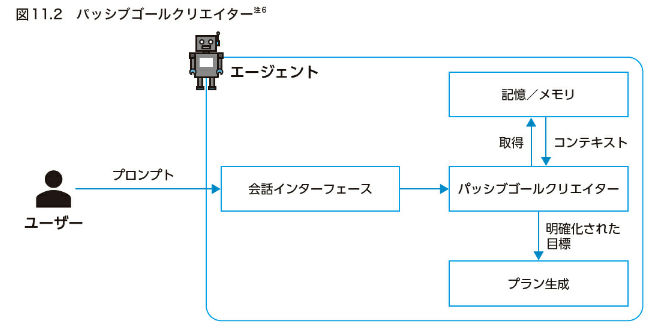

In [3]:
from IPython.display import Image
Image("./png/1_pgg.png")

#### 次の手順でユーザーの入力を処理する
1. ユーザーからの入力をテキストで受け取る
2. LLMを用いて入力テキストを処理し、含まれている目標や要求を特定する
3. 特定された目標を、AIエージェントが処理しやすい構造化された形式（リスト、辞書、Pydanticモデルなど）に変換する
4. 必要に応じて、目標の優先順位付けや依存関係の特定を行う
5. 構造化された目標をAIエージェントの次のステップに渡す

#### 特徴
* あくまでもユーザーが提供した情報のみに基づいて動作する。たとえば、ユーザーが明示的に言及していない「予算」や「移動手段」については目標として抽出しない。これらの要素が重要だと判断した場合は、後続の処理でユーザーに追加の質問をする必要がある。

#### 関連パターン
* プロアクティブゴールクリエイター：
    * ユーザーの明示的な入力以外の情報も利用して目標を生成するため、パッシブゴールクリエイターを補完する役割を果たす。
* プロンプト／レスポンス最適化：
    * 抽出された目標をより効果的なプロンプトに変換する際に使用でき、パッシブゴールクリエイターの出力を最適化するのに役立つ。
* シングルパスプランジェネレータ：
    * パッシブゴールクリエイタで抽出された目標をもとに、具体的な行動計画を生成するために使用される
* エージェント評価器：
    * パッシブゴールクリエイタの性能を評価し、抽出された目標の質を向上させるのに役だつ

# 2. プロアクティブゴールクリエイター
* ユーザーの明示的な指示だけでなく、ユーザーの取り巻く環境を理解し先回りした対応をとるような能動的な目標設定を実現するためのパターン

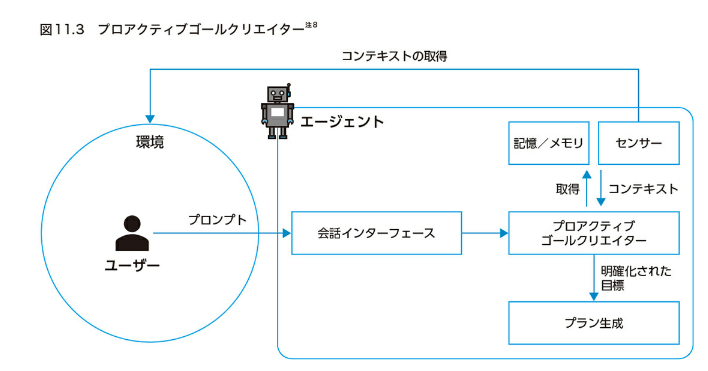

In [4]:
from IPython.display import Image
Image("./png/2_pag.png")

#### 次の手順で動作
1. ユーザーの入力や明示的な要求を受け取る
2. ユーザーの過去の行動履歴、現在の状況（時間、場所など）、外部情報（天気予報、イベント情報など）を収集する
3. 収集した情報を分析し、ユーザーが明示していない潜在的なニーズや考慮すべき要素を特定する
4. 特定された要素をもとに、追加の目標や考慮事項を生成する
5. 生成された追加目標を、ユーザーの明示的な要求と統合する
6. 統合された目標セットをAIエージェントの次の処理ステップに渡す

#### 例
ユーザーの「明日の朝６時に起こして」という指示に対して：  
* 天気予報をチェックし、雨の場合は気性が遅くなる傾向があるので１５分早く起こす
* 朝食の準備時間を考慮し、コーヒーメーカーの起動時間を設定する etc...

パッシブゴールクリエイタがユーザーの明示的な入力のみを扱うのに対し、プロアクティブゴールクリエイターは幅広い情報源から状況を分析し、先回りして目標を設定するが、積極的な目標設定はユーザーの意図と乖離する可能性があるため注意

#### 関連パターン
* パッシブゴールクリエイター：
    * プロアクティブゴールクリエイターの基礎となる部分を担当し、明示的な要求の処理を行う
* RAG：
    * 目標設定に必要な外部情報を取得する際に利用できる
* マルチモーダルガードレール：
    * 設定された目標が倫理的・道義的に適切かどうかを検証する際に使用できる
* エージェント評価器：
    * 設定された目標の適切性や有効性を評価する際に使用できる

# プロンプト／レスポンス最適化
* LLMに入力するプロンプトの質に大きく依存するため、AIエージェントとのプロンプトを通じたやり取りをより効果的にするためのパターン

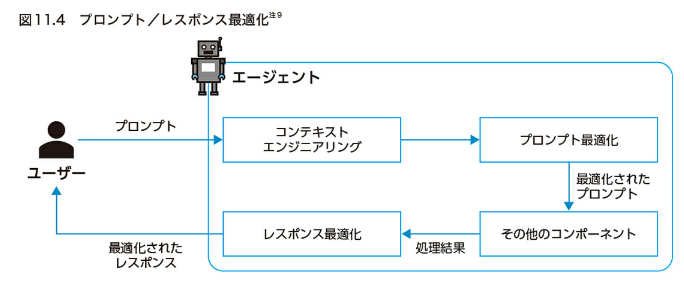

In [5]:
from IPython.display import Image
Image("./png/3_prompt.png")

「家族向けの観光スポットを５つ提案して』→『小学生の子供がいる５人家族向けで、屋外と屋内のアクティビティをバランスよく含む観光スポットを５つ、それぞれの特徴と所要時間付きで提案して』  
と、より具体的で構造化されたプロンプトのほうが、質の高い回答を得られる可能性が高くなる。  

#### 次の手順で動作
1. もとのプロンプトや目標を受け取る
2. プロンプトの構造や内容を分析する
3. タスクの種類や目的に応じたテンプレートを選択または生成する
4. テンプレートにもとのプロンプトの情報を組み込み、最適化されたプロンプトを生成する
5. 最適化されたプロンプトを使ってLLMに問い合わせる
6. 得られたレスポンスを評価し、必要に応じてさらに最適化を行う

目標の抽出自体は行わず、抽出された目標やユーザー要求を、LLMが扱うために最も効果的な形に変換する役割を果たす。  

#### 関連パターン
* パッシブゴールクリエイター：
    * 抽出された目標をプロンプト／レスポンス最適化として利用できる
* プロアクティブゴールクリエイター：
    * 能動的に生成された目標も、最適化の対象となる
* ワンショットモデルクエリ、インクリメンタルモデルクエリ：
    * 最適されたプロンプトは、これらのクエリパターンの効果を高める
* セルフリフレクション：
    * 最適化されたプロンプトとレスポンスの品質評価に活用できる
* エージェント評価器：
    * 最適化されたプロンプトやレスポンスの効果の評価に活用できる

# 4. RAG
* LLMの生成能力に外部情報からの検索を組み合わせる

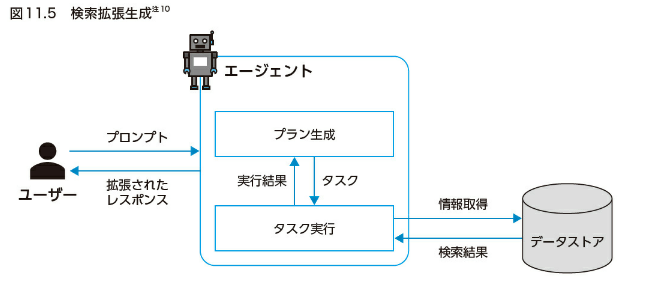

In [1]:
from IPython.display import Image
Image("./png/4_rag.png")

#### 動作手順
1. ユーザーから質問や要求を受け取る
2. 質問から検索クエリを生成する
3. 生成されたクエリを使用して、外部情報源（web、データベース、ファイルサーバー上の文書など）から関連情報を検索する
4. 検索結果をフィルタリング、リランキングし、最も関連性の高い情報を選択する
5. 選択された情報と、もともとの質問を組み合わせて、新しいプロンプトを作成する
6. 作成されたプロンプトをLLMに入力し、回答を生成する
7. 必要に応じて、生成された回答の事実確認や補足を行う

#### 関連パターン
* プロアクティブゴールクリエイター：
    * 外部情報を活用して、より適切な目標を設定できる
* プロンプト／レスポンス最適化：
    * 検索結果を組み込んだ、より効果的なプロンプトを作成できる
* セルフリフレクション：
    * 生成された回答の正確性を、再度外部情報源と照合して検証できる
* インクリメンタルモデルクエリ：
    * 外部情報と生成結果を組みあわせ、プラン生成の質を向上させることができる
* エージェントアダプター：
    * 外部情報源との効率的な接続を可能にすることで、検索機能を強化する

# 5. シングルパスプランジェネレーター
* ユーザーの目標を達成するための一連の手順や行動計画を生成するパターン
* 比較的単純なタスクや、明確な手順が存在する問題に対して効果的

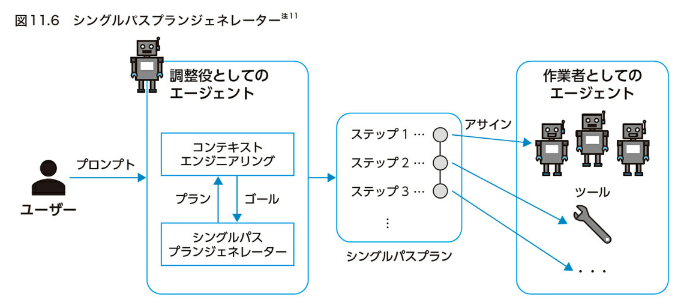

In [2]:
from IPython.display import Image
Image("./png/5_sp.png")

#### 動作手順
1. ユーザー要求を入力として受け取る
2. 目標達成に必要なステップを順序立てて生成する
3. 各ステップの実行に必要な詳細情報や、注意点を追加する
4. 生成された計画全体を、一貫性と完全性の観点からチェックする
5. 完成した計画をユーザーに提示する

#### 課題
* 各プランの詳細さのバランス（細かすぎる、おおざっぱすぎる）
* 想定外の状況への対応

#### 関連パターン
* マルチパスプランジェネレータ：
    * 複数の選択肢や条件分岐を含む複雑な計画を生成する。シングルパスで十分な場合と、マルチパスが必要な場合を適切に判断することが重要
* パッシブゴールクリエイター／プロアクティブゴールクリエイター：
    * これらのパターンで抽出または生成された目標を入力として受け取り、具体的な行動計画に変換する
* プロンプト／レスポンス最適化：
    * 生成するプランの品質を向上させるために、プロンプトを最適化することができる
* RAG：
    * プラン生成時に必要な具体的な情報（例：電車の時刻表、会場の位置情報）を取得するために使用できる
* セルフリフレクション：
    * 生成されたプランの妥当性や完全性を評価し、必要に応じて修正を加えるために使用できる
* エージェント評価器：
    * 生成されたプランの品質や効果を評価し、プランジェネレータの性能向上に貢献する

# 6. マルチパスプランジェネレーター
* 複数の選択肢や条件分岐を含む複雑な計画を生成する
* 不確実性の高い状況や、ユーザーの好みや外部要因によって計画が変わる可能性があるケースで有効

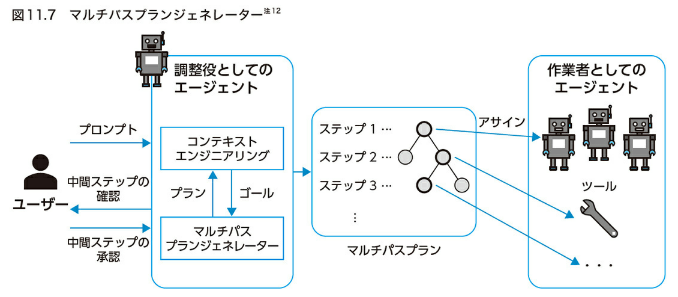

In [3]:
from IPython.display import Image
Image("./png/6_mp.png")

#### 動作手順
1. ユーザーの目標や要求、考慮すべき変数を入力として受け取る
2. 主要な分岐点や意思決定ポイントを特定する
3. 各分岐点での選択肢を生成する
4. 選択肢ごとに、その後の行動計画を生成する
5. 各選択肢のメリット、デメリット、条件などを生成する
6. 生成された複数の計画を統合し、全体の構造を整理する
7. ユーザーまたはエージェントが選択や判断を行いやすいよう、計画を構造化して提示する

AIエージェントは各ステップで複数の選択肢を提示し、ユーザーの状況や前のステップの結果に基づいて、最適な選択肢を選ぶことができる。  

#### 課題
* 選択肢の数と深さのバランス
* 計画全体の一貫性の維持 etc...

#### 関連パターン
* プロアクティブゴールクリエイター：
    * ユーザーが明示的に指定していない選択肢や条件を予測し、より包括的な計画を生成するのに役立つ
* RAG：
    * 各選択肢に関する具体的な情報（営業時間、料金、評判など）を取得するために使用できる
* プロンプト／レスポンス最適化：
    * 複雑な計画を生成する際のプロンプトを最適化し、より質の高い選択肢を生成するのに役立つ
* セルフリフレクション、クロスリフレクション：
    * 生成された計画の各選択肢の妥当性や整合性を評価し、必要に応じて修正を加えるために使用できる
* ヒューマンリフレクション：
    * 生成された複数の選択肢からユーザーが選択を行い、その選択に基づいて計画を更新するために使用できる
* エージェント評価器：
    * 生成された複数の計画オプションの品質や実現可能性を評価し、最適な選択を支援する
  

# 7. セルフリフレクション
* AIエージェントが自身の出力や推論プロセスを評価し、必要に応じて自身で修正を行う

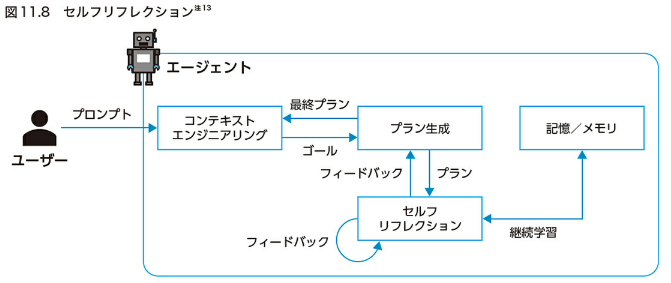

In [4]:
from IPython.display import Image
Image("./png/7_sr.png")

#### 動作手順
1. AIエージェントが初期の回答や判断を生成する
2. 生成された結果に対して、事前に定義された評価基準、記憶／メモリに保存された教訓に基づきフィードバックを行う
3. AIエージェントがフィードバックを分析し、問題点や改善点を特定する
4. 特定された問題点や改善点を記憶／メモリに保存する（教訓として今後のリフレクションで活用する）
5. 生成された回答や判断を、特定された問題点に基づいて修正する
6. 必要に応じて、このプロセスを複数回繰り返す
7. 改善された結果をユーザーに提示する

#### 課題
* 適切な評価基準の設定
* 無限ループ etc...

#### 関連パターン
* プロンプト／レスポンス最適化：
    * セルフリフレクションの結果をもとに、より効果的なプロンプトを生成することができる
* RAG：
    * セルフリフレクションの過程で追加情報が必要になった場合、外部ソースから情報を取得するのに使用できる
* マルチパスプランジェネレーター：
    * 複数の選択肢のそれぞれに対してセルフリフレクションを適用し、各オプションの品質を向上させることができる
* クロスリフレクション：
    * セルフリフレクションと組み合わせることで、複数の支店からの評価が可能になり、より全体感のある改善が期待できる
* エージェント評価器：
    * セルフリフレクションの家庭や結果を客観的に評価し、リフレクション能力の向上につなげることができる

# クロスリフレクション
* 複数のAIエージェントや異なるLLMなどが互いの出力を評価し、フィードバックを提供し合う
* 単一のAIエージェントでは捉えきれない多様な観点や専門知識を取り入れ、全体感が考慮された信頼性の高い結果を得るのが目標

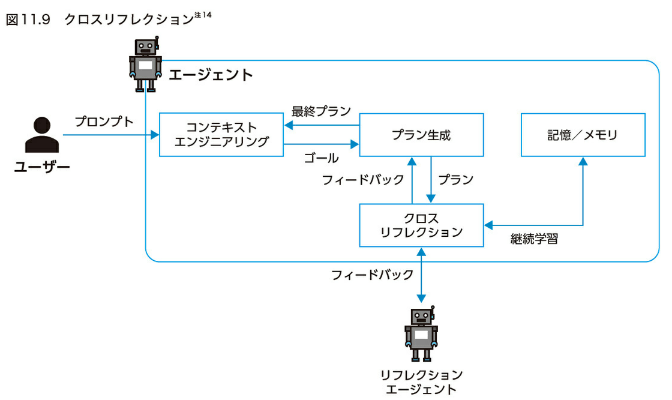

In [5]:
from IPython.display import Image
Image("./png/8_cr.png")

#### 動作手順
1. 主要なAIエージェントが初期の回答や判断を生成する
2. 生成された結果を、異なる専門性や視点を持つ他のAIエージェントに、過去の教訓と共に提示する
3. 各エージェントが初期の結果に対してフィードバックを行う
4. 得られたフィードバックを結合し、生成された回答や判断の問題点や改善点を特定する
5. 特定された問題点や改善点を記憶／メモリに保存する（教訓として今後のリフレクションで活用する）
6. 生成された回答や判断を、特定された問題点に基づいて修正する
7. 必要に応じて、このプロセスを複数回繰り返す
8. 改善された結果と、各エージェントからの主要な指摘をユーザーに提示する

#### 課題
* 適切な専門家の選択と設計
* 異なる視点からのフィードバックの統合方法
* エージェント間で意見が分かれた場合の調停メカニズム

#### 関連パターン
* セルフリフレクション：
    * クロスリフレクションの前後にセルフリフレクションを行うことで、さらに深い洞察を得られる
* プロンプト／レスポンス最適化：
    * クロスリフレクションの結果をもとに、より効果的なプロンプトを生成することができる
* RAG：
    * 各専門家が評価を行う際に、最新の専門情報を参照するのに使用できる
* ヒューマンリフレクション：
    * AIエージェントによるクロスリフレクションの結果を人間の専門家がさらにレビューすることで、より信頼性の高い結果を得られる
* エージェント評価器：
    * クロスリフレクションのプロセスや結果の有効性を評価し、改善点を特定するのに役立つ
  

# 9. ヒューマンリフレクション
* AIエージェントの出力や判断に対して、人間が評価やフィードバックを提供を、それをもとにエージェントの動作の性能を向上させる
* AIエージェント独自では難しい倫理的判断、文脈理解、創造性の評価などにおいて、人間の知恵と経験を活用

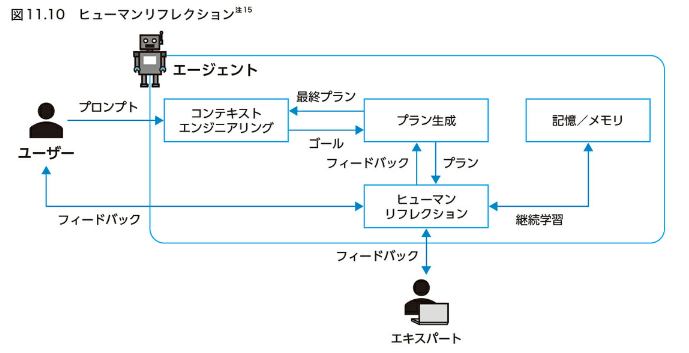

In [6]:
from IPython.display import Image
Image("./png/9_hf.png")

#### 動作手順
1. AIエージェントが初期の回答や判断を生成する
2. 生成された結果を、人間の専門家または一般ユーザーに、過去の教訓とともに提示する
3. 人間が結果を評価し、フィードバックを提供する
4. AIエージェントがフィードバックを分析し、問題点や改善点を特定する
5. 特定された問題点や改善点を記憶／メモリに保存する（教訓として今後のリフレクションで活用する）
6. 生成された回答や判断を、特定された問題点に基づいて修正する
7. 必要に応じて、このプロセスを複数回繰り返す
8. 改善された結果をユーザーに提示する

#### 課題
* 評価基準の標準化
* 人間の主観や偏見 etc...

#### 関連パターン
* セルフリフレクション：
    * ヒューマンリフレクションの前にAIエージェントがセルフリフレクションを行うことで、人間への負担を軽減し、より洗練された初期出力を提供できる
* クロスリフレクション：
    * 複数のAIエージェントによる評価のあとに人間がさらに評価を行うことで、多角的かつ深い洞察を得ることができる
* プロンプト／レスポンス最適化：
    * 人間からのフィードバックをもとに、より効果的なプロンプトを生成することができる
* マルチパスプランジェネレーター：
    * 人間の選好や判断を各選択肢の評価に取り入れることで、より適切な計画を生成できる

# 10. ワンショットモデルクエリ
* 調整役としてのエージェントが行うプラン生成において、プランのすべてのステップを一度のLLM呼び出しで生成する
* 「１ドルは何円？」といった明確で直接的な質問に対するプラン生成では、一回のクエリで解決した回答が得られので、そういったケースで利用

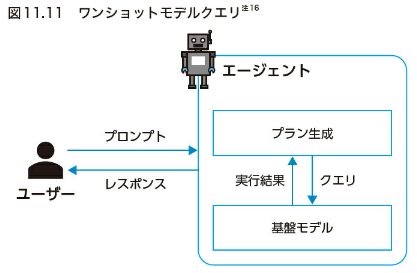

In [7]:
from IPython.display import Image
Image("./png/10_os.png")

#### 動作手順
1. ユーザーからの質問や指示を受け取る
2. 受け取った入力に対し、必要に応じて前処理やフォーマット調整を行う
3. 調整された入力をLLMに単一のクエリとして送信する
4. LLMから得られた応答を後処理する
5. 処理された応答をユーザーに返す

#### 課題
* 複雑な要求や多段階の推論が必要なプラン生成タスクへの対応は難しい

#### 関連パターン
* プロンプト／レスポンス最適化：
    * 効果的なワンショットクエリを生成するために使用できる
* RAG:
    * クエリに関連する追加情報を取得する際に使用できる
* パッシブゴールクリエイター：
    * ユーザーの入力から具体的な目標を抽出し、それをワンショットクエリに変換する際に使用できる

# インクリメンタルモデルクエリ
* プラン生成プロセスの各ステップでLLMにアクセスし、段階的に推論を進める

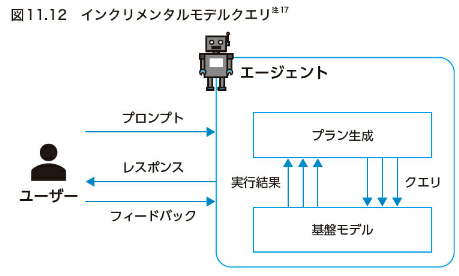

In [8]:
from IPython.display import Image
Image("./png/11_ic.png")

#### 動作手順
1. ユーザーからの初期の質問や指示を受け取る
2. 初期クエリを生成し、LLMに送信する
3. LLMからの応答を分析し、追加情報が必要な点や改善が必要な点を、LLMによる分析や人間からのフィードバックによって特定する
4. 特定された点に基づいて、フォローアップクエリを生成する
5. フォローアップクエリをLLMに送信し、追加の情報や改善された回答を得る
6. 必要に応じてステップ３～５を繰り返す
7. 得られた情報を統合し、最終的な回答を生成する
8. 統合された回答をユーザーに提示する

* LLMが生成した回答を分析する点はセルフリフレクションと似ているが、セルフリフレクションは回答の品質に着目しているのに対し、インクリメンタルモデルクエリは情報の拡張（多様な情報収集）にフォーカスしている

#### 関連パターン
* セルフリフレクション：
    * 各クエリの応答を評価し、次のクエリの方向性を決定する際に使用できる
* プロンプト／レスポンス最適化：
    * 初期クエリ、フォローアップクエリを最適化するのに役立つ
* RAG:
    * 追加情報が必要な場合に外部情報源から情報を取得するために使用できる
* ヒューマンリフレクション：
    * 複雑なタスクの中間段階で人間による判断を要求する際に使用できる（たたき台の提示など）

# 12. 投票ベースの協調（Voting-Based Cooperation）
* 複数のAIエージェントが独立して判断や提案を行い、その結果を投票によって集約し、最終的な意思決定を行う
* 個々のAIエージェントによる判断の偏りや、意思決定の誤りを軽減することが目的

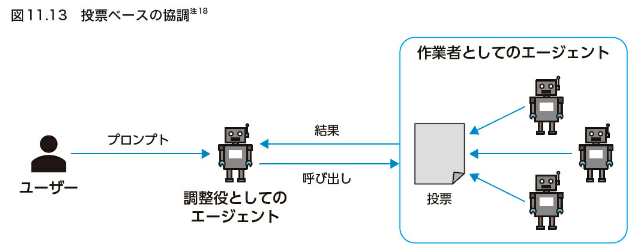

In [9]:
from IPython.display import Image
Image("./png/12_v.png")

#### 動作手順
1. 問題や課題を複数のAIエージェントに提示する
2. 各AIエージェントが独立して解答や提案を生成する
3. 生成された解答や提案を収集する
4. 事前に定義された投票方式（多数決、加重投票など）に基づいて結果を集計する
5. 集計結果に基づいて、最終的な判断や決定を行う
6. 必要に応じて、採取判断の根拠や各エージェントの意見も含めて結果を提示する

#### 関連パターン
* クロスリフレクション：
    * 投票の前に各AIエージェント間で意見交換を行うことで、より洞察に富んだ判断ができる可能性がある
* セルフリフレクション：
    * 各AIエージェントが投票前に自己評価を行うことで、より信頼性の高い投票につながる可能性がある
* ヒューマンリフレクション：
    * 投票結果に対して人間が最終判断を下したり、AIエージェントによる投票が均衡してしまった場合のタイブレーカーとして人間を作用させることができる
* プロンプト／レスポンス最適化：
    * 各AIエージェントへのクエリを最適化することで、より質の高い回答を得られる可能性がある

# 13. 役割ベースの協調（Role-Based Cooperation）
* 各エージェントの役割を明確に定義し、それぞれの専門性を活かして協調作業を行う

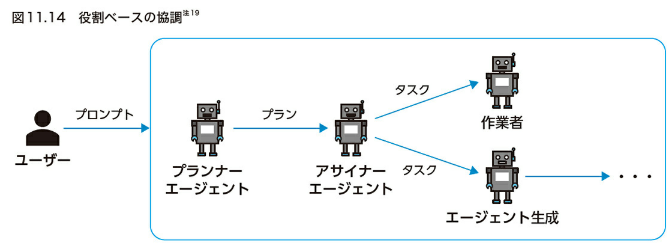

In [10]:
from IPython.display import Image
Image("./png/13_rb.png")

#### 動作手順
1. タスク全体を分析し、必要な役割を定義する
2. 各役割に適したAIエージェントを作成または割り当てる
3. エージェント間の情報共有と連携のためのプロトコルを設計する
4. タスクの実行順序や依存関係を定義する
5. 各エージェントの出力を統合し、最終的な成果物を生成する

#### 課題
* エージェント間の連携

#### 関連パターン
* パッシブゴールクリエイター：
    * 役割に応じた目標設定を活用できる。各エージェントの役割に基づいて、適切な目標を設定することができる
* プロンプト／レスポンス最適化：
    * 各役割に特化したプロンプトを生成し、エージェントの出力を最適化するのに役立つ
* クロスリフレクション：
    * 異なる役割を持つエージェント間でフィードバックを行い、成果物の質を向上させることができる
* 投票ベースの協調：
    * 役割ベースの協調と組み合わせることで、重要な意思決定を行う際に各役割の視点を考慮した投票システムを実装できる
* ツール／エージェントレジストリ：
    * さまざまな役割を持つエージェントやツールを一元管理し、必要に応じて適切なエージェントを呼び出すことができる

# 14. 議論ベースの協調（Debate-Based Cooperation）
* 複数のAIエージェントが対話形式で意見を交換し、合意形成を図りながら問題解決を行う

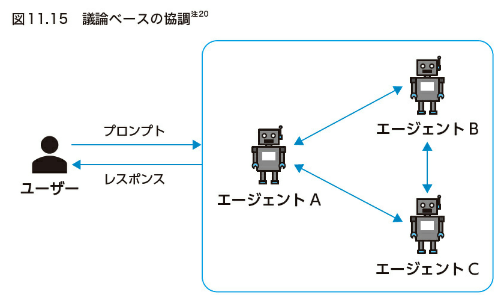

In [11]:
from IPython.display import Image
Image("./png/14_db.png")

#### 動作手順
1. 問題や課題を明確にする
2. 議論に参加するAIエージェントを選定し、それぞれの役割や専門分野を設定する
3. 議論のルールと評価基準を決める
4. 各AIエージェントが順番に意見を出し、他のエージェントの意見に対して反論や補足を行う
5. 議論の進行に応じて新たな情報や視点を導入する
6. 合意形成のプロセスを経て、最終的な結論や解決策を導き出す
7. 必要に応じて人間の専門家が議論の結果をレビューし、最終判断を下す

* 議論の進行を管理し、合意形成を促進する「モデレーターエージェント、ファシリテーターエージェント」の導入も効果的

#### 課題
* 議論の発散、合意形成に至らない

#### 関連パターン
* 役割ベースの協調：
    * 議論ベースの協調は、役割ベースの協調を拡張したもの。各エージェントの役割や専門性を明確にすることで、より効果的な議論が可能になる
* クロスリフレクション：
    * 議論ベースの協調では、エージェント間で互いの意見を評価し合うため、クロスリフレクションの要素が含まれている。これにより、各エージェントの判断や提案の質を向上させることができる
* 投票ベースの協調：
    * 議論の結果、完全な合意に至らない場合、最終的な意思決定を投票で行うことができる。議論ベースの協調と投票ベースの協調を組み合わせることで、より公平で透明性の高い意思決定プロセスを実現できる
* マルチモーダルガードレール：
    * 議論の過程で、倫理的な問題や法的な制約に抵触しないよう、マルチモーダルガードレールを適用することで、適法の範囲内で議論を進めることができる
* プロンプト／レスポンス最適化：
    * 各エージェントの発言の質を高めるために、LLMへの入力に対しプロンプト／レスポンス最適化を適用することで、より効果的な議論を期待できる

# 15. マルチモーダルガードレール
* AIエージェントの入出力を制御し、特定の要件（ユーザー要求、倫理基準、法律など）に適合させる

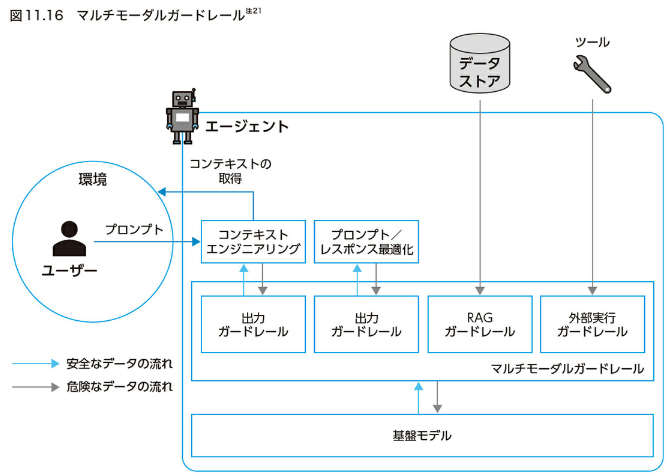

In [12]:
from IPython.display import Image
Image("./png/15_mm.png")

上記では、以下の出力の制御（ガードレール）を設けている  
* ユーザーからの入力に対する基盤モデルからの応答（出力ガードレール）
* プロンプト／レスポンス最適化に対する基盤モデルからの応答（出力ガードレール）
* 外部情報源からの参照情報（RAGガードレール）
* 外部ツールの実行結果（外部実行ガードレール）

#### 関連パターン
* プロンプト／レスポンス最適化：
    * マルチモーダルガードレールと組み合わせることで、制約条件を満たしつつ最適な応答を生成できる
* クロスリフレクション：
    * 複数のAIエージェントによる相互チェックを通じて、ガードレールの有効性を高められる
* 役割ベースの協調：
    * 異なる役割を持つAIエージェントにそれぞれ適したガードレールを適用することでリスクを軽減することができる
* RAG:
    * 最新の情報や正確なデータを参照しながら応答を生成することで、ガードレールの一部として機能し、不正確な情報の提供を防げる
* セルフリフレクション：
    * AIエージェントが自身の出力をガードレールに照らして評価し、必要に応じて修正を行うことができる
* エージェントアダプター：
    * 異なるモダリティのデータや外部システムとの連携を円滑にし、ガードレールの適用範囲を拡大する

# 16. ツール／エージェントレジストリ（Tool/Agent Registry）
* AIエージェントシステム内で利用可能な様々なツールやエージェント（サブエージェント）を一元管理し、必要に応じて適切なものを選択・呼び出す
* AIエージェントがより多くのタスクに対応するための基盤となる

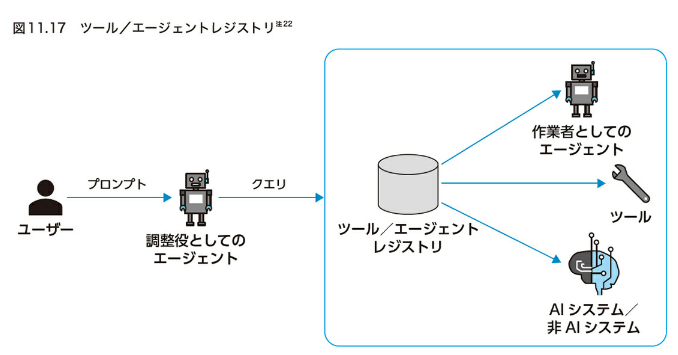

In [13]:
from IPython.display import Image
Image("./png/16_ta.png")

#### 実装手順
1. 利用可能なツールやエージェントの一覧を作成し、それぞれの機能、入出力形式、使用条件などを定義する
2. ツールやエージェントを分類し、カテゴリやタグを付与して整理する
3. 各ツール／エージェントへのアクセス方法（APIエンドポイント、関数呼び出しなど）を標準化する
4. 各ツール／エージェントの検索、選択、呼び出しを行うためのインターフェースを実装する
5. 新しいツール／エージェントの追加や既存のものの更新を容易に行えるメカニズムを用意する
6. ツール／エージェントの使用状況や性能をモニタリングし、最適化するための仕組みを実装する

#### 課題
* AIエージェント自身がいかに適切なツールやエージェントを選定できるか

#### 関連パターン
* 役割ベースの協調：
    * ツール／エージェントレジストリと組み合わせることで、各役割に適したツールやエージェントを効率的に割り当てることができる
* マルチモーダルガードレール：
    * レジストリ内のツールやエージェントに対して、適切なガードレールを適用することで、安全性と信頼性を確保できる
* プロンプト／レスポンス最適化：
    * 各ツールやエージェントの使用時に、最適化されたプロンプトを生成することで、より効果的な結果を得ることができる
* クロスリフレクション：
    * 複数のツールやエージェントの結果を相互評価することで、より信頼性の高い出力を得られる
* RAG:
    * レジストリ内のツールやエージェントの使用方法や最新の情報を、検索を通じて効率的に提供することができる。ツール候補の絞り込みに使用することも有用
* エージェントアダプター：
    * レジストリ内の多様なツールやエージェントとの効率的な連携を可能にし、システムの柔軟性を高める
* エージェント評価器：
    * レジストリ内のツールやエージェントの性能を評価し、最適な選択を支援する

# 17. エージェントアダプター
* AIエージェントと外部ツールやシステムとの間のインターフェースを提供する

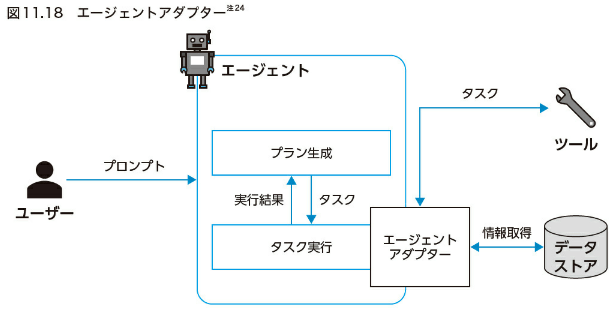

In [14]:
from IPython.display import Image
Image("./png/17_aa.png")

#### 動作手順
1. 連携対象の外部ツールやシステムを特定する
2. 各ツール・システムのAPI仕様や入出力形式を分析する
3. それぞれのツールを呼び出すための関数を作成する
4. エラーハンドリングやリトライのメカニズムを実装する
5. 必要に応じて、ツールの使用方法や制約条件をLLMのプロンプトに含める

* LangChainのTool機能を使うと、それぞれの機能をAIエージェントが使うためのツールとして定義できる

<br>

以下は、LnagChainのTool機能を利用したコード例

In [ ]:
from typing import Optional
from langchain.tools import tool
from langchain_core.pydantic_v1 import BaseModel, Field

# カレンダー管理ツールの入力スキーマ
class CalenderEventInput(BaseModel):
    action: str = Field(description="'add', 'update', 'delete', 'get'のいずれかの操作を設定する")
    event_data: dict = Field(description="カレンダーイベントの詳細")

@tool("calendar-event", args_schema=CalenderEventInput)
def calender_event(action: str, event_date: dict) -> dict:
    """カレンダー管理ツールへのアクセスが必要な場合に使用する"""
    # カレンダーAPIとの実際の通信処理
    # ...
    return {"status": "success", "message": f"{action} event successful"}

    
# メールクライアントの入力スキーマ
class SendEmailInput(BaseModel):
    to: list[str] = Field(description="送信先のメールアドレス")
    subject: str = Field(description="メールのタイトル")
    body: str = Field(description="メールの本文")
    attachments: Optional[list[str]] = Field(default=None, description="添付ファイルのファイルパスのリスト")

@tool("send-email", args_schema=SendEmailInput)
def send_email(to: list[str], subject: str, body: str, attachments: Optional[list[str]]=None) -> bool:
    """メール送信が必要な場合に使用する"""
    # メール送信処理
    # ...
    return True



### LLMへのツール付与
from langchain_openai import ChatOpenAI
from langgraph.prebuilt import create_react_agent

# チャットモデルの定義
llm = ChatOpenAI()

# エージェントの定義
agent = create_react_agent(
    model=llm,
    tools=[calendar_event, send_mail] # ここでツールを設定
)

# エージェントの実行
agent.invoke({
    "messages": [
        (
            "human",
            "明日の午後２時に打ち合わせのスケジュールを登録して、チームにミーティングの通知メールを送信して"
        )
    ]
})

このコードを実行すると、エージェントはユーザーの要求を実現すために次の動作を行う：  
1. calender_eventツールを使用して、明日の午後２時にミーティングをスケジュールする
2. send_emailツールを利用して、チームにミーティングの通知メールを送信する


#### 関連パターン
* ツール／エージェントレジストリ：
    * エージェントアダプターと組み合わせることで、多様なツールやシステムを効率的に管理し、適切に選択・実行することができる
* プロンプト／レスポンス最適化：
    * エージェントのプロンプトを最適化し、より効果的なツール使用を促せる
* マルチモーダルガードレール：
    * ツール実行時にも、入出力の適切性をチェックし、セキュリティやプライバシーを確保することができる
* エージェント評価器：
    * ツールの仕様パターンや効果を評価し、アダプターの性能を継続的に改善することができる
* RAG:
    * ツールの使用方法や制約条件に関する情報を必要に応じて検索・参照することで、より適切なツール使用を実現できる

# 18. エージェント評価器（Agent Evaluator）：
* AIエージェントの性能や動作を評価し、その結果をAIエージェントにフィードバックする
* セルフリフレクションなどのようにAIエージェントにその場でフィードバックするための仕組みではなく、AIエージェントの一連の動作ログなどを通じた定性・定量評価を行ったうえで、設計や実装面でAIエージェントをアップデートするためのしくみ

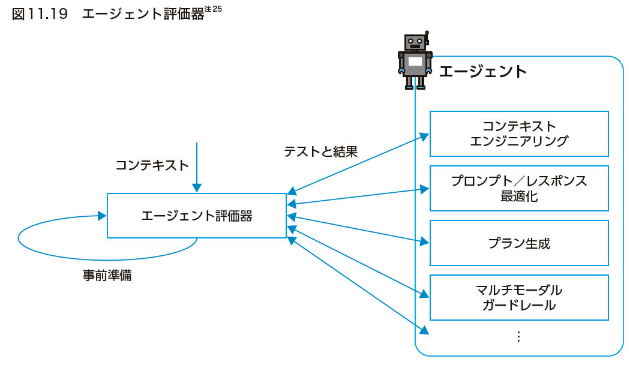

In [15]:
from IPython.display import Image
Image("./png/18_av.png")

#### 実装手順
1. 評価対象のAIエージェントとそのコンポーネントを特定する
2. 評価基準や指標を定義する（例：機能適合性、効率性、適応性）
3. テストケースや評価シナリオを作成する
4. エージェントに対して評価を実行する
5. 結果を分析し、スコアリングや評価レポートを生成する
6. 評価結果に基づいて、改善点や最適化の提案を行う
7. 必要に応じて、エージェントの調整や再設計を行う

#### 課題
* 評価指標の適切な設定（定量的指標と定性的指標のバランス）
* オンライン評価とオフライン評価の使い分け
* 具体的な改善アクションへの変換方法 etc...


#### 関連パターン
* セルフリフレクション：
    * エージェント評価器の結果を入力として、エージェント自身が自己評価や改善を行える
* クロスリフレクション：
    * 複数のエージェント評価器を用いて、異なる視点から評価を行える
* ヒューマンリフレクション：
    * エージェント評価器の結果を人間が確認し、追加のフィードバックを提供することで、評価の質を向上させることができる
* マルチモーダルガードレール：
    * エージェント評価器の結果に基づいて、ガードレールの設定を動的に調整できる
* プロンプト／レスポンス最適化：
    * エージェント評価器の結果を用いて、プロンプトやレスポンスの最適化を行える